#Support Vector Regression(SVR)

#Load and Explore the Dataset

In [35]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [36]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [38]:
df.dropna(inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


In [40]:
df.isnull().sum()

,0
Years of Experience,0
Salary,0


In [41]:
df.dropna(inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


#Features Scaling(Very important for SVR)

In [43]:
from sklearn.preprocessing import StandardScaler
x = df[['Years of Experience']].values
y = df[['Salary']]
sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)

#Flatten y for SVR

In [44]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [45]:
y_scaled = y_scaled.ravel()
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

#Train SVR Model(RBF Kernel)

In [46]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=100,epsilon=0.1)
svr.fit(x_scaled,y_scaled)

SVR(C=100)

#Predictions and inverse Scaling

In [47]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))
y_pred_scaled
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

#Visualization:Actual vs Predicted

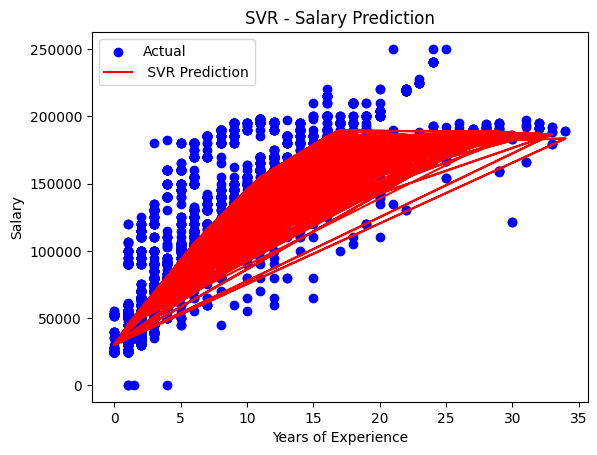

In [48]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue',label='Actual')
plt.plot(x,y_pred,color='red',label=' SVR Prediction')
plt.title("SVR - Salary Prediction")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

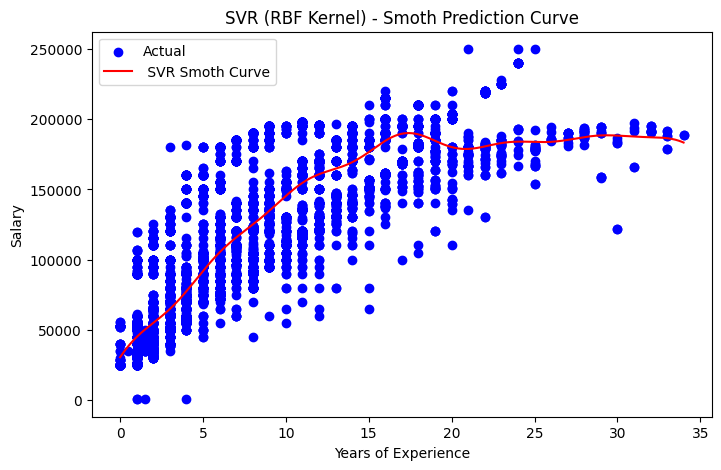

In [49]:
import numpy as np
import matplotlib.pyplot as plt
x_grid = np.arange(min(x.ravel()),max(x.ravel()),0.01)
x_grid = x_grid.reshape(-1,1)

x_grid_scaled = sc_x.transform(x_grid)

y_grid_scaled = svr.predict(x_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.scatter(x,y,color='blue',label='Actual')
plt.plot(x_grid,y_grid,color='red',label=' SVR Smoth Curve')
plt.title("SVR (RBF Kernel) - Smoth Prediction Curve")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

#Evaluate Model Performance

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y,y_pred)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

MSE: 759013901.8514212
RMSE: 27550.20692937571
R2 Score: 0.7275580175081495


#Compare Kernels Using Code

Kernel: LINEAR | R2 Score: 0.6326


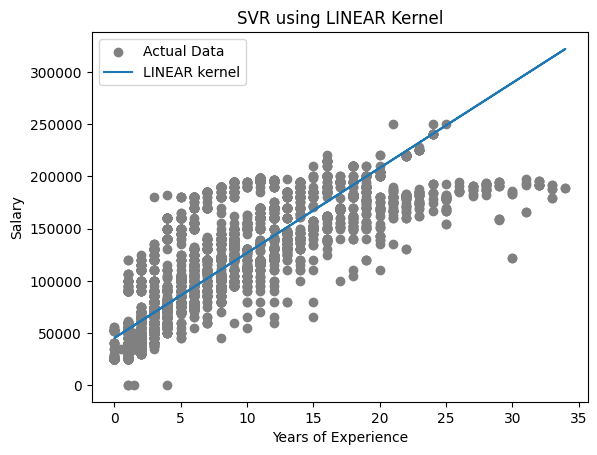

Kernel: POLY | R2 Score: 0.6326


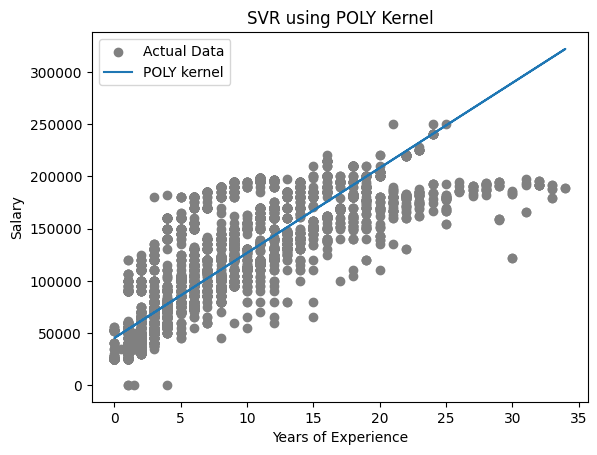

Kernel: RBF | R2 Score: 0.7249


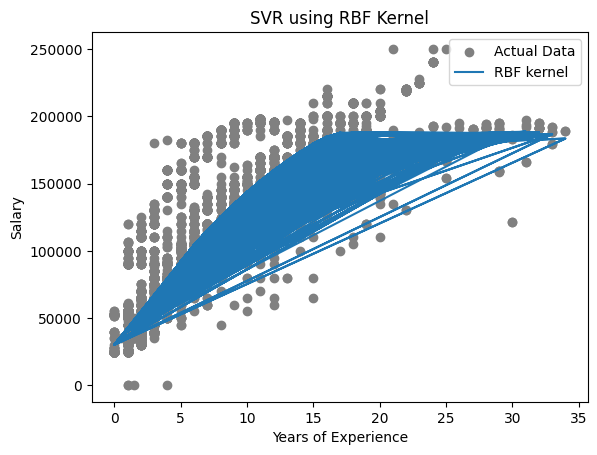

In [56]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

x = df[['Years of Experience']].values
y = df[['Salary']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y).ravel()

kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    if kernel == 'poly':
        svr = SVR(kernel=kernel, degree=2)
    else:
        model = SVR(kernel=kernel)
    model.fit(x_scaled, y_scaled)

    y_pred_scaled = model.predict(x_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    r2 = r2_score(y, y_pred)

    score = r2_score(y, y_pred)
    print(f"Kernel: {kernel.upper()} | R2 Score: {score:.4f}")

    plt.scatter(x, y, color='gray', label='Actual Data')
    plt.plot(x, y_pred, label=f'{kernel.upper()} kernel')
    plt.title(f"SVR using {kernel.upper()} Kernel")
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

kernel:LINEAR | r2 Score:(score:4f)


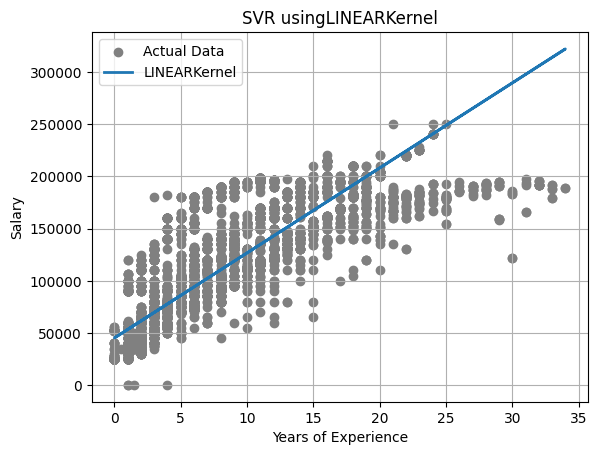

kernel:POLY | r2 Score:(score:4f)


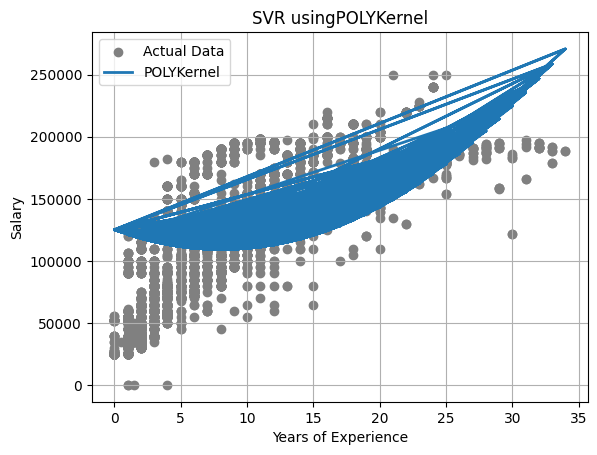

kernel:RBF | r2 Score:(score:4f)


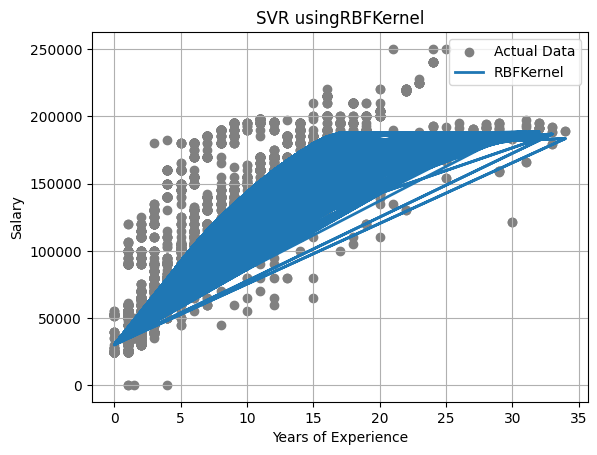

In [57]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
x=df[['Years of Experience']].values
y=df[['Salary']].values
sc_x=StandardScaler()
sc_y=StandardScaler()
x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y).ravel()
kernels=['linear','poly','rbf']
for kernel in kernels:
  if kernel=='poly':
    model=SVR(kernel=kernel,degree=2)
  else:
    model=SVR(kernel=kernel)
  model.fit(x_scaled,y_scaled)
  y_pred_scaled=model.predict(x_scaled)
  y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))
  score=r2_score(y,y_pred)
  print(f"kernel:{kernel.upper()} | r2 Score:(score:4f)")
  plt.scatter(x,y,color='gray',label='Actual Data')
  plt.plot(x,y_pred,label=f'{kernel.upper()}Kernel',linewidth=2)
  plt.title(f'SVR using{kernel.upper()}Kernel')
  plt.xlabel("Years of Experience")
  plt.ylabel("Salary")
  plt.grid(True)
  plt.legend()
  plt.show()

#Try Different c and epsilon Values

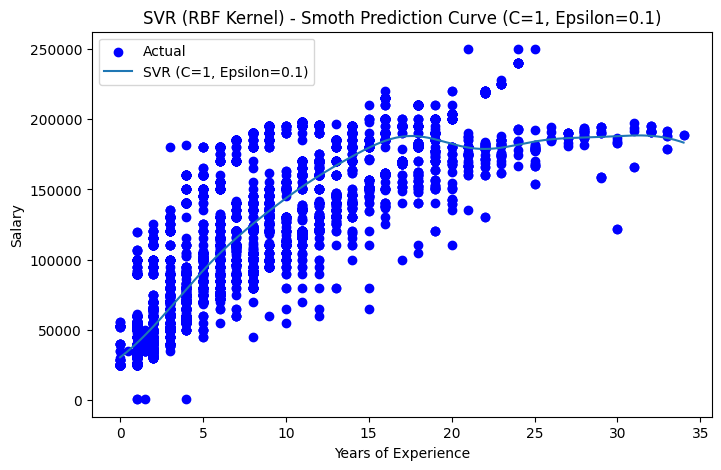

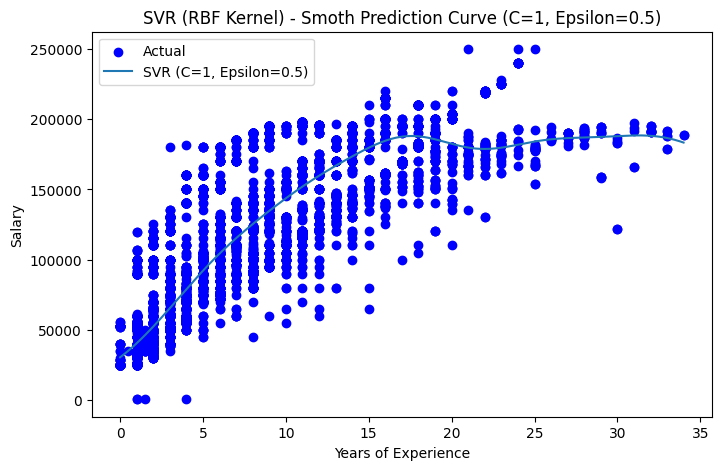

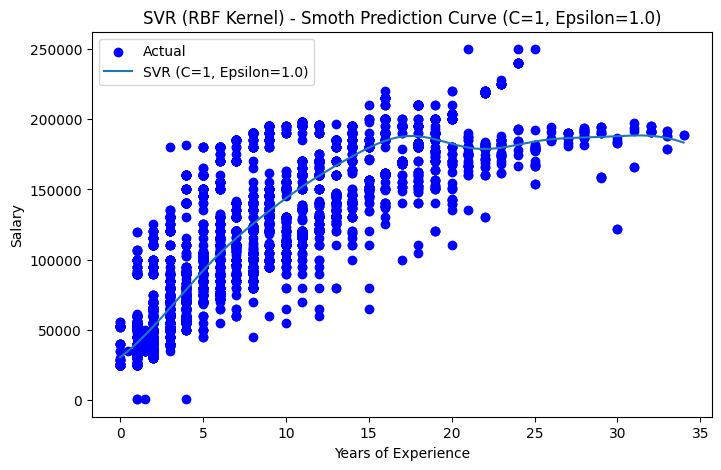

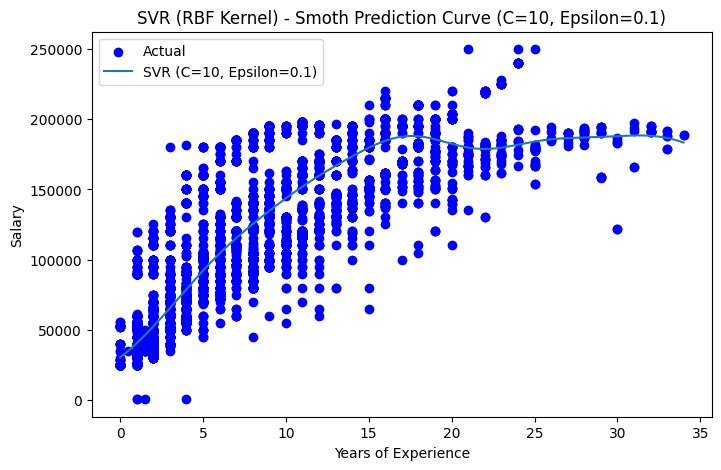

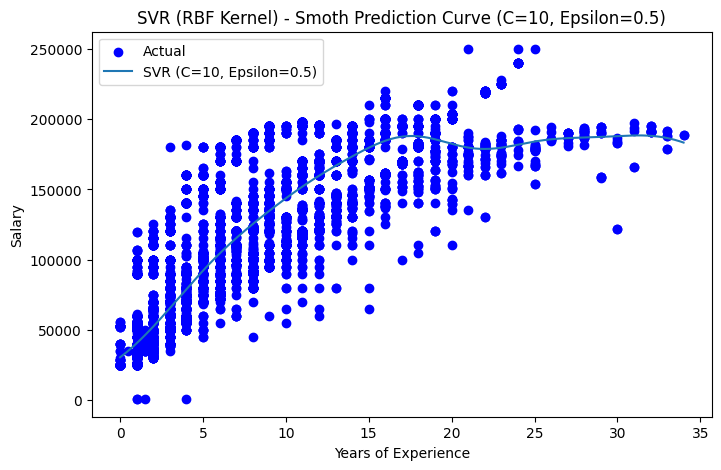

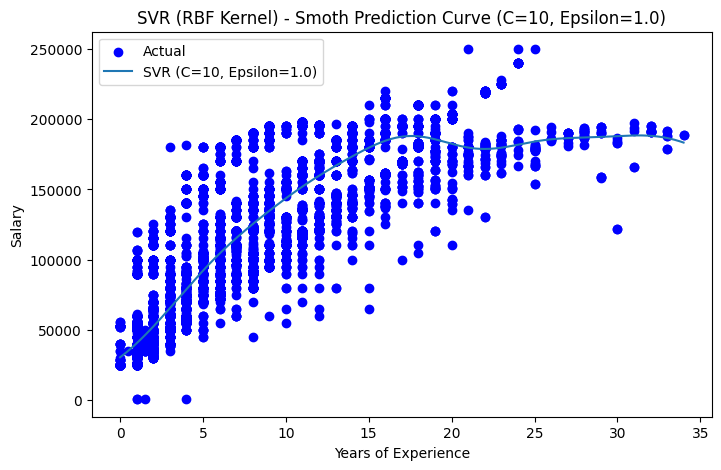

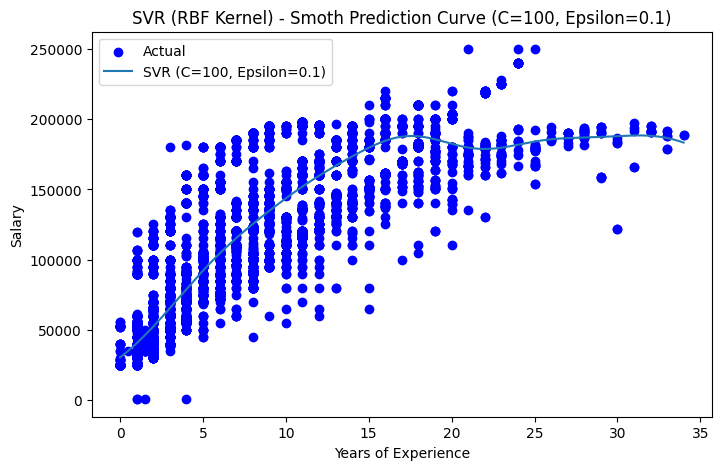

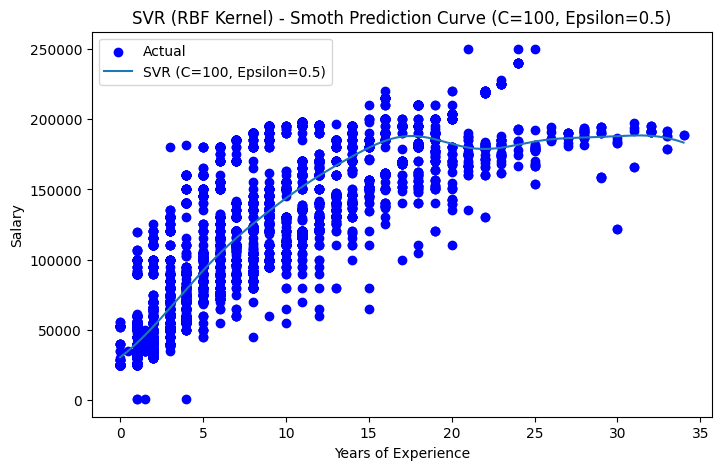

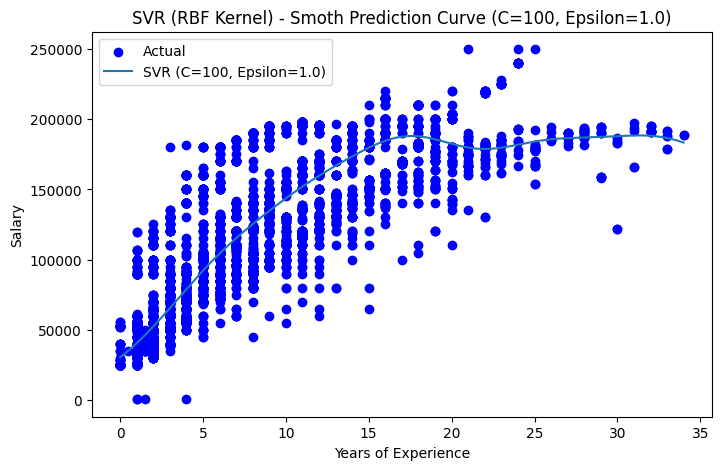

In [58]:
C_values = [1,10,100]
epsilon_values = [0.1,0.5,1.0]

x_grid = np.arange(min(x.ravel()),max(x.ravel()),0.01)
x_grid = x_grid.reshape(-1,1)

x_grid_scaled = sc_x.transform(x_grid)

for c in C_values:
    for eps in epsilon_values:
        svr = SVR(kernel='rbf',C=c,epsilon=eps)
        svr.fit(x_scaled,y_scaled)
        y_grid_scaled = model.predict(x_grid_scaled)
        y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

        plt.figure(figsize=(8,5))
        plt.scatter(x,y,color='blue',label='Actual')
        plt.plot(x_grid,y_grid,label=f'SVR (C={c}, Epsilon={eps})')
        plt.title(f"SVR (RBF Kernel) - Smoth Prediction Curve (C={c}, Epsilon={eps})")
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.legend()
        plt.show()